In [674]:
# !pip install pyarrow

In [675]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [676]:
df = pd.read_parquet("../data/dataset.parquet")
df

,date,open,high,low,close,adj close,volume,target_close,dividends_event_value,dividends_event_name,...,volume_lag_55,volume_lag_56,volume_lag_57,volume_lag_58,volume_lag_59,day_of_week,day_of_month,month,year,week_of_year
0,2014-08-06,23.687500,23.870001,23.677500,23.740000,20.998869,154232000,23.620001,0.0000,None,...,NaN,NaN,NaN,NaN,NaN,2,6,8,2014,32
1,2014-08-07,23.732500,23.987499,23.525000,23.620001,20.996649,186844000,23.684999,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,3,7,8,2014,32
2,2014-08-08,23.565001,23.705000,23.320000,23.684999,21.054420,167460000,23.997499,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,4,8,8,2014,32
3,2014-08-11,23.817499,24.020000,23.709999,23.997499,21.332216,146340000,23.992500,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,0,11,8,2014,33
4,2014-08-12,24.010000,24.219999,23.902500,23.992500,21.327774,135180000,24.309999,0.1175,dividends,...,NaN,NaN,NaN,NaN,NaN,1,12,8,2014,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-07-30,219.190002,220.330002,216.119995,218.800003,218.800003,41643800,222.080002,0.2500,dividends,...,48983000.0,45057100.0,77305800.0,78569700.0,163224100.0,1,30,7,2024,31
2512,2024-07-31,221.440002,223.820007,220.630005,222.080002,222.080002,50036300,218.360001,0.2500,dividends,...,50759500.0,48983000.0,45057100.0,77305800.0,78569700.0,2,31,7,2024,31
2513,2024-08-01,224.369995,224.479996,217.020004,218.360001,218.360001,62501000,219.860001,0.2500,dividends,...,72044800.0,50759500.0,48983000.0,45057100.0,77305800.0,3,1,8,2024,31
2514,2024-08-02,219.149994,225.600006,217.710007,219.860001,219.860001,105568600,209.270004,0.2500,dividends,...,52393600.0,72044800.0,50759500.0,48983000.0,45057100.0,4,2,8,2024,31


In [677]:
x = df.drop(columns=["target_close"]).set_index("date")
y = df[["date", "target_close"]].set_index("date")
y

,target_close
date,
2014-08-06,23.620001
2014-08-07,23.684999
2014-08-08,23.997499
2014-08-11,23.992500
2014-08-12,24.309999
...,...
2024-07-30,222.080002
2024-07-31,218.360001
2024-08-01,219.860001


In [678]:
table_info = pd.DataFrame()

# Print columns that are not int, float, bool or category
for col in x.columns:
    dtype = x[col].dtype
    if dtype not in ["int", "float64", "bool", "category"]:
        table_info = pd.concat([table_info, pd.DataFrame({"Column Name": [col], "Data Type": [x[col].dtype]})])

table_info

,Column Name,Data Type
0,volume,int64
0,dividends_event_name,object
0,splits_event_name,object


In [679]:
# Convert columns to float if they are not int, float, bool or category. Handle Cannot cast DatetimeArray to dtype float64
for col in x.columns:
    dtype = x[col].dtype
    if dtype not in ["int", "float64", "bool", "category"]:
        try:
            x[col] = x[col].astype("float")
        except:
            # drop datetime columns
            x = x.drop(columns=[col])

            print(f"Dropped Column: {col}")

Dropped Column: dividends_event_name
Dropped Column: splits_event_name


In [680]:
# # Normalizing the features between 0 and 1
# y_scaler = MinMaxScaler()
# y = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# x_scaler = MinMaxScaler()
# x = x_scaler.fit_transform(x)

# y

In [681]:
#    All Features   | Target
# +-----------------+---------+
# | x_train         | y_train | <- 85% of the data which is used for training
# |                 |         |
# +-----------------+---------+
# | x_test          | y_test  | <- 15% of the data which is used for testing
# +-----------------+---------+



# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, shuffle=True)
x_test

,open,high,low,close,adj close,volume,dividends_event_value,dividends_event_sentiment,dividends_event_decay,splits_event_value,...,volume_lag_55,volume_lag_56,volume_lag_57,volume_lag_58,volume_lag_59,day_of_week,day_of_month,month,year,week_of_year
date,,,,,,,,,,,,,,,,,,,,,
2021-04-12,132.520004,132.850006,130.630005,131.240005,128.815796,91420000.0,0.2050,1.0,0.411100,4.0,...,120150900.0,104319500.0,90757300.0,111598500.0,90221800.0,0,12,4,2021,15
2020-11-30,116.970001,120.970001,116.809998,119.050003,116.676628,169410200.0,0.2050,1.0,0.738569,4.0,...,180860300.0,182274400.0,176940500.0,231366600.0,332607200.0,0,30,11,2020,49
2019-09-12,56.200001,56.605000,55.715000,55.772499,54.030388,128906800.0,0.1925,1.0,0.628347,0.0,...,84281200.0,72881600.0,191202400.0,86056000.0,84496800.0,3,12,9,2019,37
2024-03-12,173.149994,174.029999,171.009995,173.229996,172.995346,59825400.0,0.2400,1.0,0.654256,4.0,...,52242800.0,40714100.0,55751900.0,128256700.0,66831600.0,1,12,3,2024,11
2015-08-13,29.010000,29.100000,28.635000,28.787500,26.027676,194143200.0,0.1300,1.0,0.903921,0.0,...,183332800.0,282790400.0,182384000.0,158921600.0,145819600.0,3,13,8,2015,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-22,50.707500,51.235001,50.584999,51.132500,49.158524,77758000.0,0.1825,1.0,0.371602,0.0,...,162958400.0,244439200.0,166348800.0,104768400.0,134142000.0,0,22,4,2019,17
2020-03-31,63.900002,65.622498,63.000000,63.572498,61.918255,197002000.0,0.1925,1.0,0.483213,0.0,...,140644800.0,170108400.0,132079200.0,108872000.0,118387200.0,1,31,3,2020,14
2019-02-06,43.662498,43.892502,43.212502,43.560001,41.699516,112958400.0,0.1825,1.0,0.303626,0.0,...,243204000.0,187531600.0,204542000.0,137463200.0,101450400.0,2,6,2,2019,6


In [682]:
y_test

,target_close
date,
2021-04-12,134.429993
2020-11-30,122.720001
2019-09-12,54.687500
2024-03-12,171.130005
2015-08-13,28.990000
...,...
2019-04-22,51.869999
2020-03-31,60.227501
2019-02-06,42.735001


In [683]:
# model = xgb.XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# model = xgb.XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=1, colsample_bytree=0.8)
model = xgb.XGBRegressor(n_estimators=150, max_depth=7, eta=0.1, subsample=1, colsample_bytree=.5)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=150,
             n_jobs=None, num_parallel_tree=None, ...)

In [684]:
predicted = model.predict(x_test)
predicted

array([131.69939 , 119.831474,  56.34939 , 174.0867  ,  28.78615 ,
        54.993942,  29.249924, 164.96835 , 163.9162  , 159.47629 ,
        24.060835,  42.772873,  54.180706,  27.59103 , 135.0207  ,
       149.80122 , 151.78789 ,  32.408985,  26.725796,  47.741253,
       187.9945  ,  78.34303 ,  54.14509 ,  50.27984 ,  42.7483  ,
        43.491364,  32.605095, 190.50992 ,  50.010475, 135.30392 ,
        24.85369 , 175.10641 , 173.64087 ,  23.42806 , 176.6283  ,
        60.48877 ,  24.792873,  35.96192 ,  52.68013 ,  39.563076,
       127.02846 , 138.38818 ,  27.459724,  38.055763, 225.9967  ,
       211.74513 , 143.95184 ,  31.743572, 145.69032 ,  28.984152,
        35.88198 ,  27.022848,  42.246384, 131.52759 ,  29.299139,
        37.594624,  24.583687,  23.986303,  35.966312,  58.30284 ,
        90.20593 ,  24.801405,  27.240889,  43.46368 , 150.72899 ,
        31.656101,  31.680883,  47.218513,  34.941257,  26.768858,
        41.511272,  79.36539 ,  25.132153, 150.87822 ,  24.883

In [685]:
# Add predicted values to the dataframe
y_test["predicted"] = predicted
y_test

,target_close,predicted
date,,
2021-04-12,134.429993,131.699387
2020-11-30,122.720001,119.831474
2019-09-12,54.687500,56.349388
2024-03-12,171.130005,174.086700
2015-08-13,28.990000,28.786150
...,...,...
2019-04-22,51.869999,50.741528
2020-03-31,60.227501,63.962559
2019-02-06,42.735001,43.900154


In [686]:
# Get the root mean squared error (RMSE)
mse = np.mean((y_test["predicted"] - y_test["target_close"]) ** 2)
rmse = np.sqrt(mse)
rmse

1.994770275625978

In [687]:
# Get the mean absolute error (MAE)
mae = np.mean(np.abs(y_test["predicted"] - y_test["target_close"]))
mae

1.2441737311226981

In [688]:
# Get the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((y_test["target_close"] - y_test["predicted"]) / y_test["target_close"])) * 100
mape

1.4249689519969084

In [ ]:
# sort the values by date
y_test = y_test.sort_index()

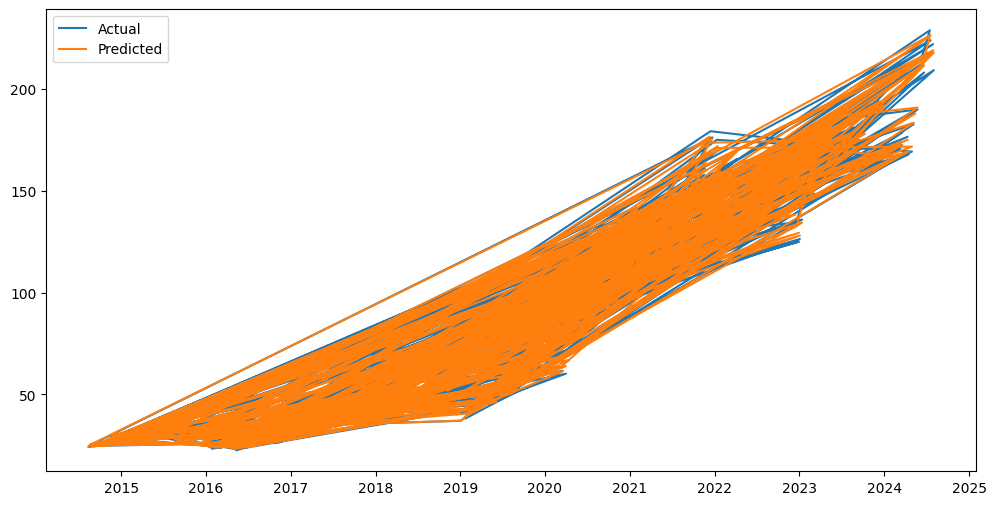

In [689]:
# Plot the predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test["target_close"], label="Actual")
plt.plot(y_test["predicted"], label="Predicted")
plt.legend()
plt.show()